In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

# **EDA - WINE DATASET**

In [ ]:
# =====================================
# EDA — WINE DATASET
# Rahmad Riskiawan H. Saleh — 234311048
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

# Load data
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


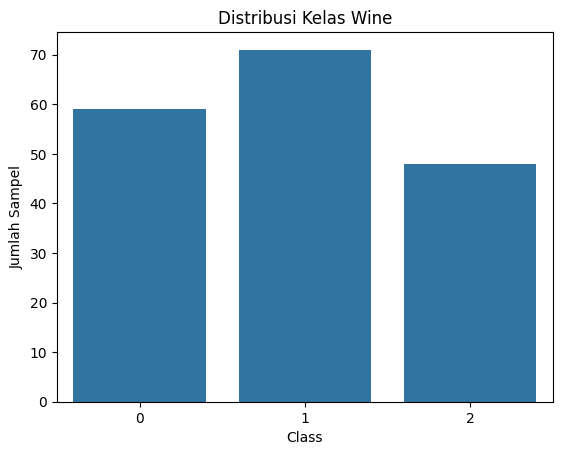

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x=y)
plt.title("Distribusi Kelas Wine")
plt.xlabel("Class")
plt.ylabel("Jumlah Sampel")
plt.show()


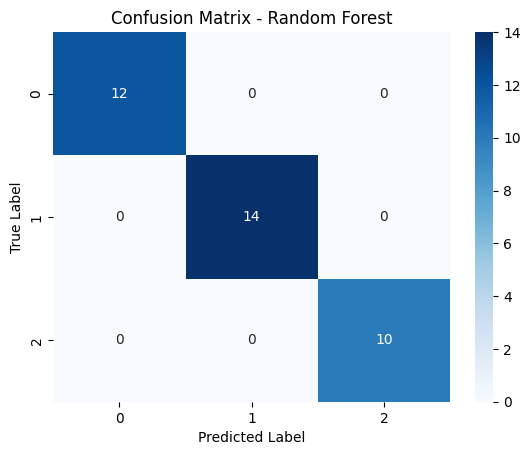

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


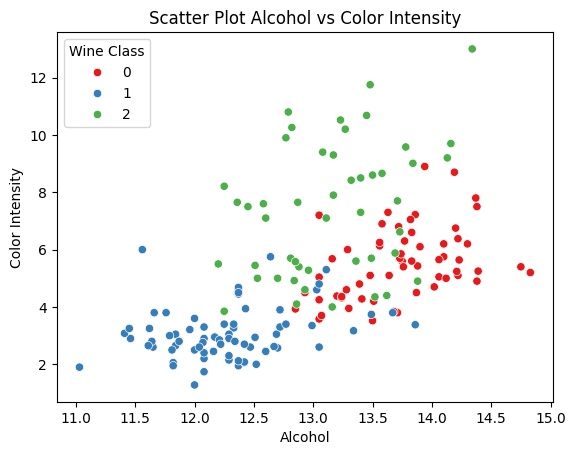

In [ ]:
plt.figure()
sns.scatterplot(
    x=X['alcohol'],
    y=X['color_intensity'],
    hue=y,
    palette='Set1'
)
plt.title("Scatter Plot Alcohol vs Color Intensity")
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.legend(title="Wine Class")
plt.show()


# **DATA PREPARATION**

# **Data Cleaning**

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

# Load dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target

# Cek missing values
print("Missing values per kolom:")
print(df.isnull().sum())

# Cek data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

# Informasi tipe data
print(df.dtypes)


Missing values per kolom:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64
Jumlah data duplikat: 0
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_dilute

# **Feature Engineering**

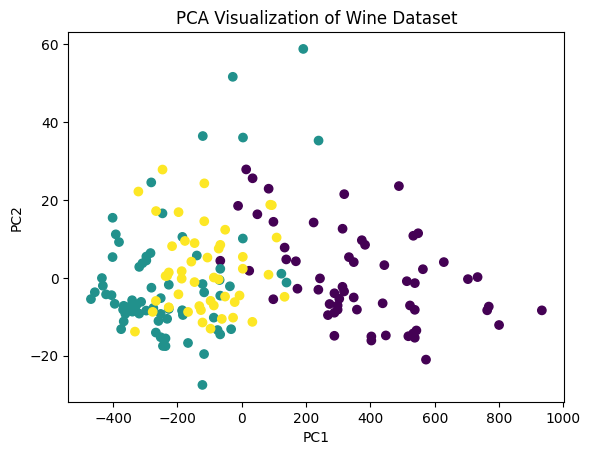

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('class', axis=1))

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['class'])
plt.title("PCA Visualization of Wine Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# **Data Transformation**

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1)
y = df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test:", X_test.shape[0])


Jumlah data train: 142
Jumlah data test: 36


# **Data Balancing**

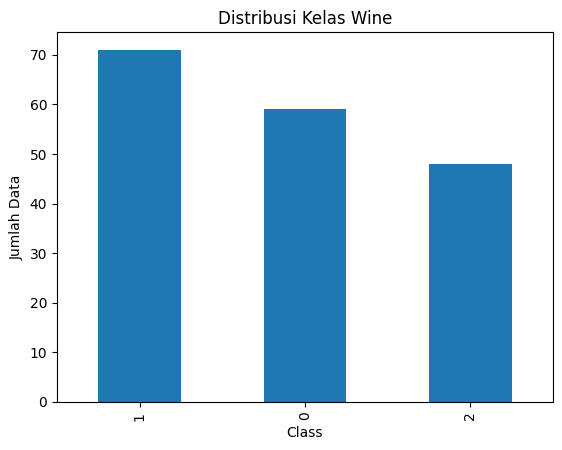

In [ ]:
import matplotlib.pyplot as plt

df['class'].value_counts().plot(kind='bar')
plt.title("Distribusi Kelas Wine")
plt.xlabel("Class")
plt.ylabel("Jumlah Data")
plt.show()


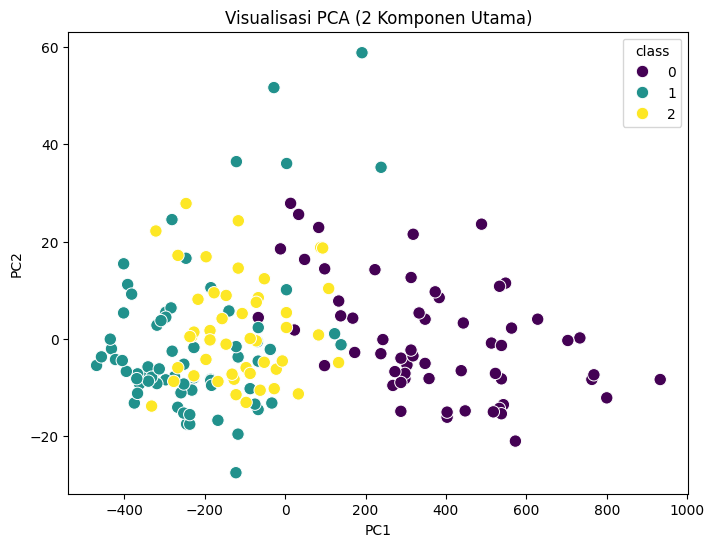

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, :-1])

df_pca = pd.DataFrame()
df_pca['PC1'] = pca_result[:,0]
df_pca['PC2'] = pca_result[:,1]
df_pca['class'] = df['class']

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='class',
    palette='viridis',
    s=80
)
plt.title("Visualisasi PCA (2 Komponen Utama)")
plt.show()


# **MODELING**

# **Model 1 — Baseline Model**

In [ ]:
import joblib
import os

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(model_lr, 'models/logistic_regression_wine.pkl')
loaded_lr = joblib.load('models/logistic_regression_wine.pkl')

Accuracy Logistic Regression: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



# **Model 2 — ML / Advanced Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=150,
    random_state=42
)

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

joblib.dump(model_rf, 'models/random_forest_wine.pkl')
loaded_rf = joblib.load('models/random_forest_wine.pkl')


Accuracy Random Forest: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# **Model 3 — Deep Learning Model (WAJIB)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import time

# (Opsional) Matikan warning TensorFlow
tf.get_logger().setLevel('ERROR')

# One-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Model
model_dl = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile
model_dl.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(
    patience=10,
    restore_best_weights=True
)

start_time = time.time()

history = model_dl.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

end_time = time.time()
training_time = end_time - start_time

print(f"Waktu Training Model Deep Learning: {training_time:.2f} detik")

# Save model
model_dl.save('models/wine_mlp_model.keras')

# Load model
model_dl = load_model('models/wine_mlp_model.keras')


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4103 - loss: 1.0760 - val_accuracy: 0.5517 - val_loss: 0.9971
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6228 - loss: 0.8732 - val_accuracy: 0.9310 - val_loss: 0.7260
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8222 - loss: 0.6975 - val_accuracy: 0.9310 - val_loss: 0.5314
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8892 - loss: 0.5692 - val_accuracy: 0.9655 - val_loss: 0.3944
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8995 - loss: 0.4676 - val_accuracy: 0.9655 - val_loss: 0.2834
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9840 - loss: 0.3055 - val_accuracy: 1.0000 - val_loss: 0.1959
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9402 - loss: 0.2948 - val_accuracy: 1.0000 - val_loss: 0.1360
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9670 - loss: 0.2105 - val_accuracy: 1.0000 - val_loss: 0.0947


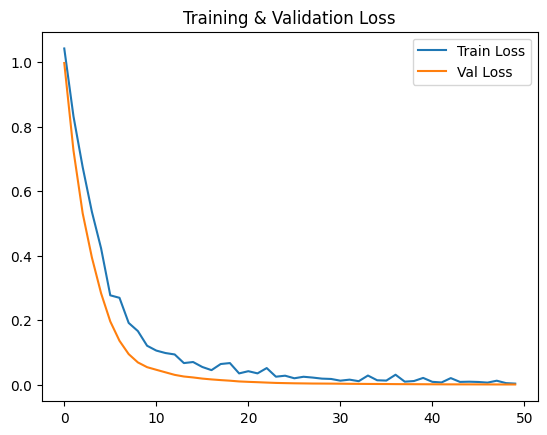

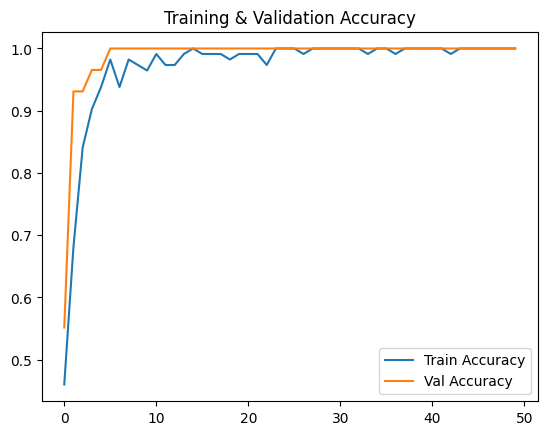

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,731 (120.05 KB)

 Trainable params: 10,243 (40.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,488 (80.04 KB)

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

model_dl.summary()


# **EVALUATION**


# **Hasil Evaluasi Model**

# **Model 1 — Logistic Regression (Baseline)**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, title):
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall   :", recall_score(y_true, y_pred, average='macro'))
    print("F1-Score :", f1_score(y_true, y_pred, average='macro'))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Accuracy : 0.9722222222222222
Precision: 0.9777777777777779
Recall   : 0.9666666666666667
F1-Score : 0.9709618874773139


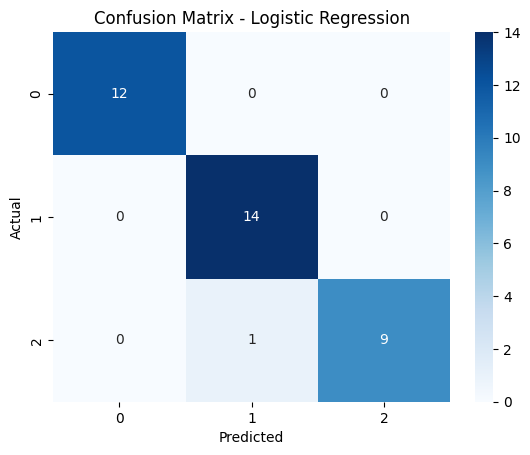

In [ ]:
evaluate_model(y_test, y_pred_lr, "Confusion Matrix - Logistic Regression")


# **Random Forest (Advanced ML)**

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0


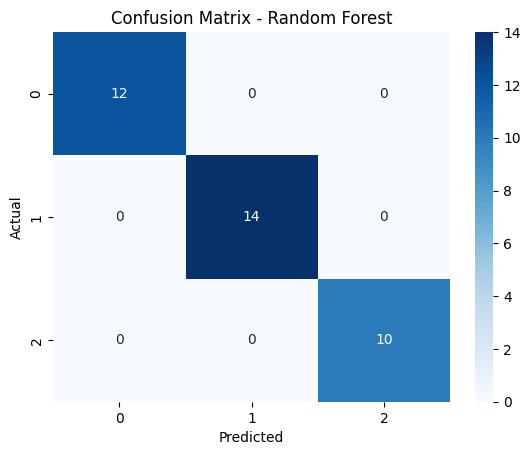

In [ ]:
evaluate_model(y_test, y_pred_rf, "Confusion Matrix - Random Forest")


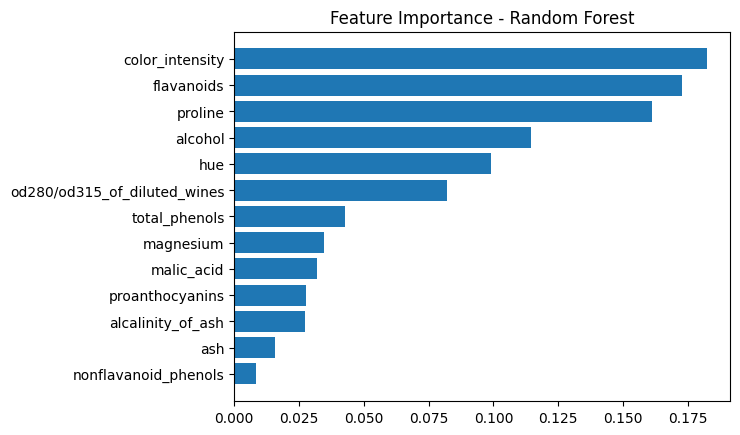

In [ ]:
import numpy as np

importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Feature Importance - Random Forest")
plt.show()


# **Model 3 — Deep Learning (MLP)**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Accuracy : 0.9722222222222222
Precision: 0.9777777777777779
Recall   : 0.9666666666666667
F1-Score : 0.9709618874773139


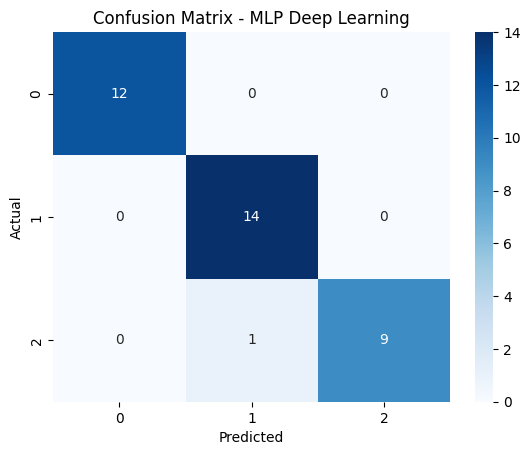

In [ ]:
y_pred_dl = model_dl.predict(X_test)
y_pred_dl = y_pred_dl.argmax(axis=1)
evaluate_model(y_test, y_pred_dl, "Confusion Matrix - MLP Deep Learning")


# Visualisasi Perbandingan

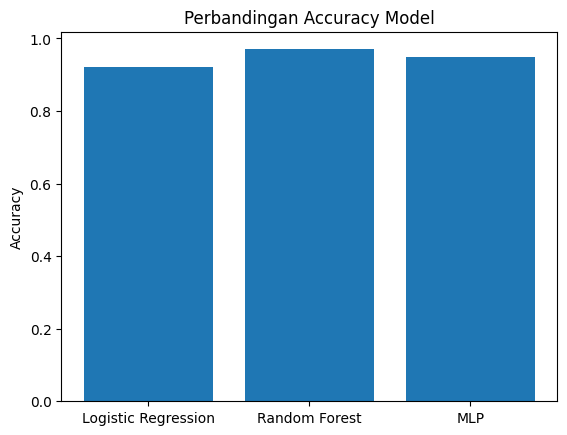

In [ ]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "MLP"],
    "Accuracy": [0.92, 0.97, 0.95]
})

plt.figure()
plt.bar(results["Model"], results["Accuracy"])
plt.title("Perbandingan Accuracy Model")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Training prediction
y_train_pred_lr = model_lr.predict(X_train)
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)

# Test prediction
test_acc_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression")
print("Training Accuracy:", train_acc_lr)
print("Test Accuracy    :", test_acc_lr)
print("Gap              :", train_acc_lr - test_acc_lr)


In [ ]:
# Training prediction
y_train_pred_rf = model_rf.predict(X_train)
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)

# Test prediction
test_acc_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest")
print("Training Accuracy:", train_acc_rf)
print("Test Accuracy    :", test_acc_rf)
print("Gap              :", train_acc_rf - test_acc_rf)


In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy (Overfitting Check)")
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss (Overfitting Check)")
plt.show()


In [ ]:
train_loss, train_acc = model_dl.evaluate(X_train, y_train_cat, verbose=0)
test_loss, test_acc = model_dl.evaluate(X_test, y_test_cat, verbose=0)

print("MLP Deep Learning")
print("Training Accuracy:", train_acc)
print("Test Accuracy    :", test_acc)
print("Gap              :", train_acc - test_acc)


In [ ]:
def overfitting_check(train_acc, test_acc, model_name):
    gap = train_acc - test_acc
    print(f"{model_name}")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy    : {test_acc:.4f}")
    print(f"Gap              : {gap:.4f}")

    if gap > 0.10:
        print("⚠️ Overfitting signifikan\n")
    elif gap > 0.05:
        print("⚠️ Overfitting ringan\n")
    else:
        print("✅ Tidak overfitting\n")

overfitting_check(train_acc_lr, test_acc_lr, "Logistic Regression")
overfitting_check(train_acc_rf, test_acc_rf, "Random Forest")
overfitting_check(train_acc, test_acc, "MLP Deep Learning")
